Loss = 0.004176889546215534, GAIN_loss = 0.0023555252701044083, GAIN_rmse = 0.0018213641596958041, 
 BW_loss = 0.04853375256061554, BW_rmse = 0.042677443474531174
21/21 [==============================] - 0s 3ms/step
REAL -0.569153636363636 PRED [-0.5699048]
REAL -0.576530363636364 PRED [-0.5850859]
REAL -0.612083090909091 PRED [-0.6061085]
REAL -0.323668 PRED [-0.35711154]
REAL -0.604401090909091 PRED [-0.5728767]
REAL -0.579174545454545 PRED [-0.5946804]
REAL -0.651991454545454 PRED [-0.65112454]
REAL -0.603160545454545 PRED [-0.60565114]
REAL -0.507617636363636 PRED [-0.5164701]
REAL -0.470036181818182 PRED [-0.4640003]
REAL -0.570262 PRED [-0.5704535]
REAL -0.400256181818182 PRED [-0.37609515]
REAL -0.633728 PRED [-0.63759995]
REAL -0.599250363636364 PRED [-0.5998764]
REAL -0.577740363636364 PRED [-0.57927454]
REAL -0.485944727272727 PRED [-0.62657005]
REAL -0.529067818181818 PRED [-0.50299746]
REAL -0.647160545454545 PRED [-0.6474123]
REAL -0.593917272727273 PRED [-0.3872499]
REAL 

REAL -0.453465272727273 PRED [-0.42606255]
REAL -0.592924 PRED [-0.59972256]
REAL -0.599970181818182 PRED [-0.60056126]
REAL -0.624470545454545 PRED [-0.61558855]
REAL -0.510000545454545 PRED [-0.5666428]
REAL -0.599806363636364 PRED [-0.5998321]
REAL -0.491661272727273 PRED [-0.48678792]
REAL -0.461509454545455 PRED [-0.4316368]
REAL -0.386561818181818 PRED [-0.37724608]
REAL -0.641466545454545 PRED [-0.6384922]
REAL -0.665188909090909 PRED [-0.6686734]
REAL -0.539783272727273 PRED [-0.5346364]
REAL -0.626797090909091 PRED [-0.61669743]
REAL -0.613999454545455 PRED [-0.60639775]
REAL -0.691345090909091 PRED [-0.66454303]
REAL -0.564479636363636 PRED [-0.5670912]
REAL -0.474921090909091 PRED [-0.46266365]
REAL -0.606824 PRED [-0.56390905]
REAL -0.623746363636364 PRED [-0.61552]
REAL -0.586386727272727 PRED [-0.59909683]
REAL -0.556983818181818 PRED [-0.56448317]
REAL -0.475395090909091 PRED [-0.5475929]
REAL -0.661639454545454 PRED [-0.6489748]
REAL -0.659540181818182 PRED [-0.63946706

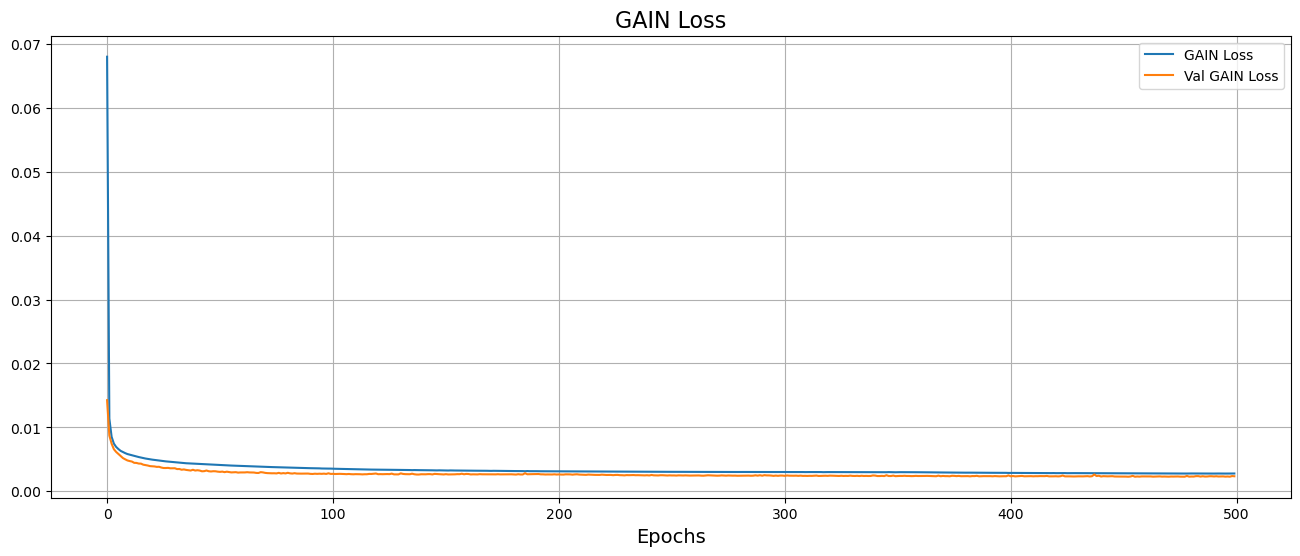

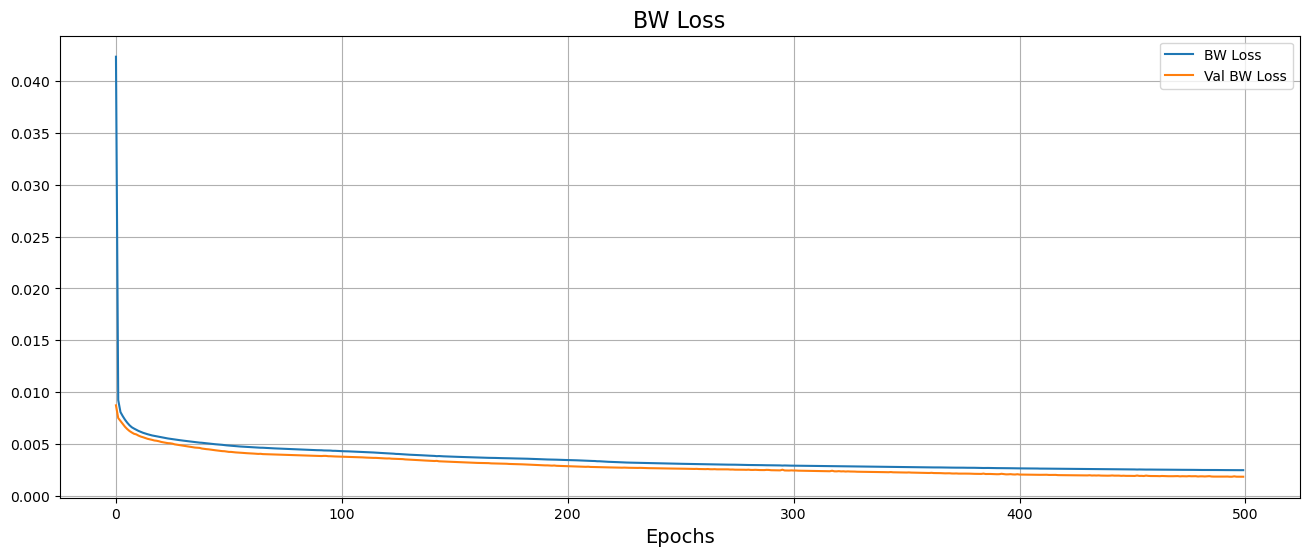

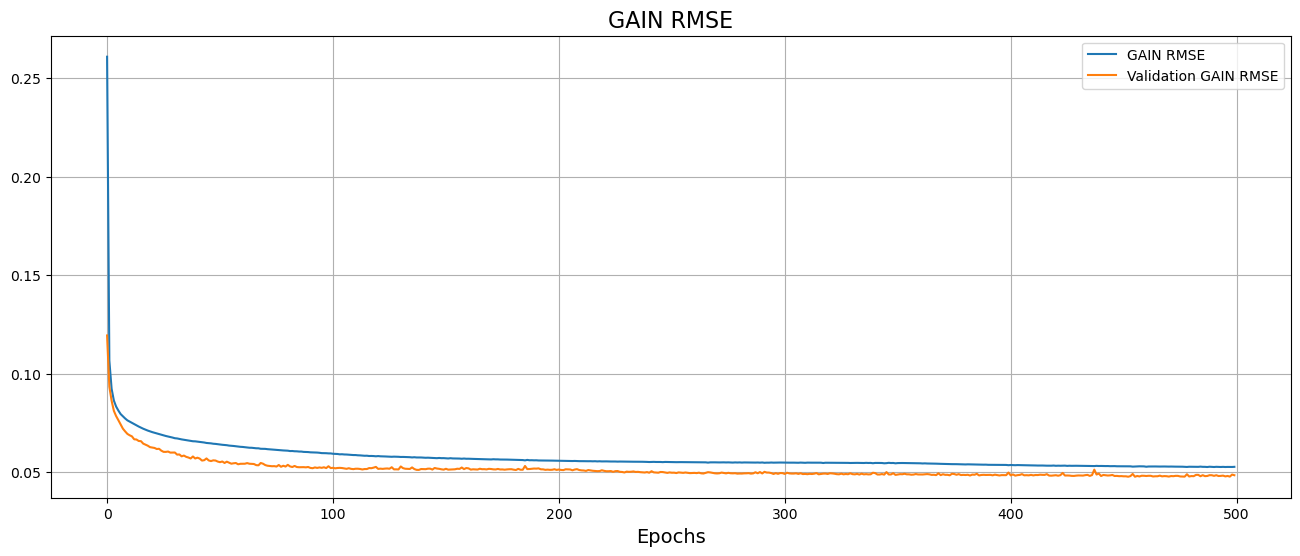

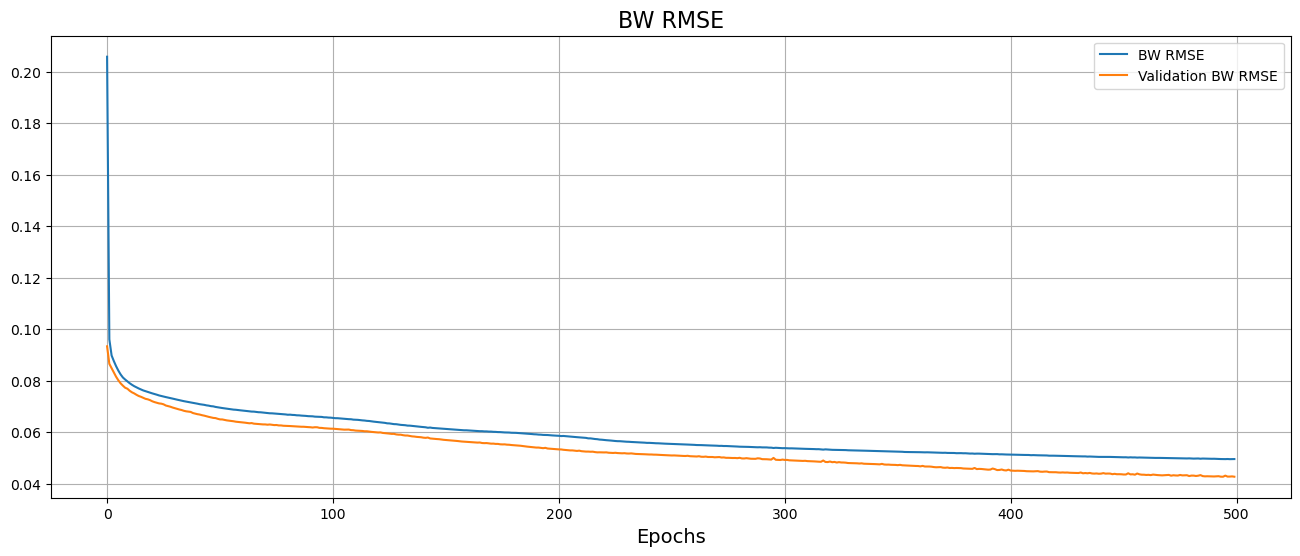

In [7]:
#Import libraries

import requests
import pydot

#Data visualization
import seaborn as sn
import matplotlib.pyplot as plt

#Data Manipulation
import pandas as pd
import numpy as np

# Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split


df = pd.read_csv(r'C:\Users\HAKAN\Desktop\BİTİRME - PROJESİ\hakan.csv')
df = df.drop(['Name','Value.constraint_gain_constraint','Value.constraint_pm_constraint' ], axis=1)



#Train test split
x_train, x_test = train_test_split(df, test_size = 0.3,random_state=42)

#train values
Y1_train = np.array(x_train["Value.gain"])
Y2_train = np.array(x_train["Value.bw"])

#test values
Y1_test = np.array(x_test["Value.gain"])
Y2_test = np.array(x_test["Value.bw"])

#remove the target values from the dataset
x_train = x_train.drop(["Value.gain","Value.bw"], axis = 1)
x_test = x_test.drop(["Value.gain","Value.bw"], axis = 1)


     

#normalization
x_train_norm = (x_train-x_train.mean())/x_train.std()
x_test_norm = (x_test-x_test.mean())/x_test.std()


     


# defining layers
input_layer = Input(shape=(len(x_train.columns)))
dense_layer_1 = Dense(units = 8, activation = "relu")(input_layer) 
dense_layer_2 = Dense(units = 8, activation = "relu")(dense_layer_1)
dense_layer_3 = Dense(units = 5, activation = "relu")(dense_layer_2)


#GAIN_outpuoutput
y1_output = Dense(units = 1, activation = "linear", name = "GAIN_output")(dense_layer_2)

#BW_output output
y2_output = Dense(units = 1, activation = "linear", name = "BW_output")(dense_layer_3)

#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

#specify the optimizer and compile with the loss function for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer = optimizer,
              loss = {'GAIN_output':'mse', 'BW_output':'mse'},
              metrics = {
                  'GAIN_output':tf.keras.metrics.RootMeanSquaredError(),
                  'BW_output':tf.keras.metrics.RootMeanSquaredError(),
              }
             )
plot_model(model, show_shapes=True )


#training process
history = model.fit(x_train_norm, (Y1_train, Y2_train), epochs = 500, batch_size = 10,
                    validation_data = (x_test_norm, (Y1_test, Y2_test)), verbose = 0)


     

#testing process
loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse = model.evaluate(x = x_test_norm, y = (Y1_test, Y2_test), verbose=0)
print(f"Loss = {loss}, GAIN_loss = {Y1_loss}, GAIN_rmse = {Y1_rmse}, \n BW_loss = {Y2_loss}, BW_rmse = {Y2_rmse}")



history.history.keys()


     
def plot_line(metric_1,metric_2, title, label1, label2):
    plt.figure(figsize=(16,6))
    plt.title(title, fontsize = 16)
    plt.plot(metric_1, label = label1)
    plt.plot(metric_2, label = label2)
    plt.xlabel("Epochs", fontsize = 14)
    plt.grid()
    plt.legend(loc= "best")
    
def scatter_plot(true, predictions, title):
    plt.figure(figsize=(16,6))
    plt.scatter(predictions, true)
    plt.title(title, fontsize = 16)
    plt.xlabel("Predictions", fontsize = 14)
    plt.ylabel("Real", fontsize = 14)
    plt.grid()

loss = history.history["loss"]
y1_output_loss = history.history["GAIN_output_loss"]
y2_output_loss = history.history["BW_output_loss"]
y1_output_rmse = history.history["GAIN_output_root_mean_squared_error"]
y2_output_rmse = history.history["BW_output_root_mean_squared_error"]

val_loss = history.history["loss"]
val_y1_output_loss = history.history["val_GAIN_output_loss"]
val_y2_output_loss = history.history["val_BW_output_loss"]
val_y1_output_rmse = history.history["val_GAIN_output_root_mean_squared_error"]
val_y2_output_rmse = history.history["val_BW_output_root_mean_squared_error"]


     

plot_line(y1_output_loss, val_y1_output_loss, title ="GAIN Loss", label1 = "GAIN Loss", label2 = "Val GAIN Loss")
plot_line(y2_output_loss, val_y2_output_loss, title ="BW Loss", label1 = "BW Loss", label2 = "Val BW Loss")
plot_line(y1_output_rmse, val_y1_output_rmse, title ="GAIN RMSE", label1 = "GAIN RMSE", label2 = "Validation GAIN RMSE")
plot_line(y2_output_rmse, val_y2_output_rmse, title ="BW RMSE", label1 = "BW RMSE", label2 = "Validation BW RMSE")
 

Y1_pred , Y2_pred = model.predict(x_test_norm)

#scatter_plot(Y1_test, Y1_pred, "GAIN")
#scatter_plot(Y2_test, Y2_pred, "BW")

for i in range(len(Y1_pred)):
    print('REAL',Y1_test[i],'PRED' ,Y1_pred[i])
    
